# Stock Market Prediction using Numerical and Textual Analysis

### Task : 8
### Name : **Neavil Porus A**


## 1. Stock Market Prediction
Load stock market into dataframe and initial check the data.

### Import Important Libraries

In [ ]:
import warnings
import re
import random
import pandas as pd
from pandas.plotting import scatter_matrix, autocorrelation_plot

import numpy as np
from numpy import newaxis

import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

import timeit
from datetime import datetime

import math
import missingno as msno

from keras.models import Sequential

from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import MinMaxScaler

#from fbprophet import Prophet

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA


from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from xgboost import XGBClassifier


print ('Libraries imported')

Libraries imported


### Define the function needed

In [ ]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return  TextBlob(text).sentiment

def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

print ('Support functions defined')

Support functions defined


### Load Data

In [ ]:
#Let's get the stock data
stock_data = pd.read_csv('BSESN.csv', 
                      index_col='Date', 
                      parse_dates=['Date'])
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0


In [ ]:
# FIgure out the dataframe colomns
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4946 entries, 2001-01-02 to 2020-10-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4872 non-null   float64
 1   High       4872 non-null   float64
 2   Low        4872 non-null   float64
 3   Close      4872 non-null   float64
 4   Adj Close  4872 non-null   float64
 5   Volume     4872 non-null   float64
dtypes: float64(6)
memory usage: 270.5 KB


In [ ]:
# Drop any null values in colomns
stock_data = stock_data.dropna()

### Plot the Data

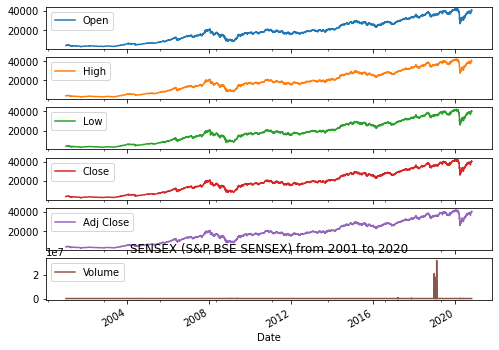

In [ ]:
stock_data['2001':'2020'].plot(subplots=True, figsize=(8,6))
plt.title('SENSEX (S&P BSE SENSEX) from 2001 to 2020')
plt.savefig('stocks.png')
plt.show(block=False)

### Moving Average

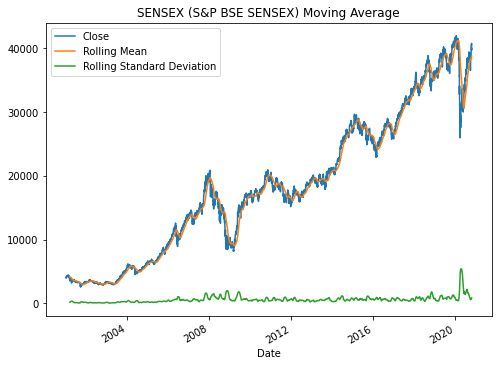

In [ ]:
close = stock_data['Close']
ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(8, 6))
plt.title('SENSEX (S&P BSE SENSEX) Moving Average')
stock_data['Close'].plot(label = 'Close')
ma.plot(label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()

### Return

<AxesSubplot:xlabel='Date'>

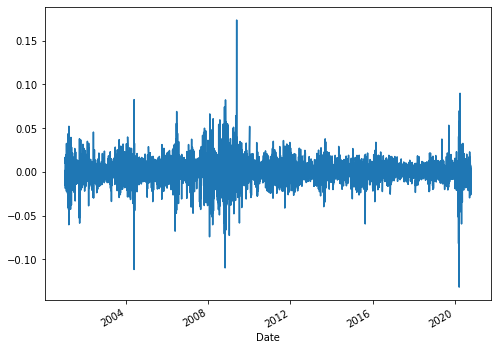

In [ ]:
stock_data['Return'] = stock_data['Adj Close'].pct_change()
stock_data['Return'].plot(figsize=(8,6))

## 2. Textual Analysis

### Lines below use to get Polarity and Subjectivity from dataset.
Load the dataset and adjust some features.

In [ ]:
'''
#Load dataset into dataframe
news_data = pd.read_csv('D:\_PROJECT\GRIP\Task 4\Dataset\india-news-headlines.csv')

#Rename columns name
new_cols = ['Date','Category','News']
news_data.columns = new_cols

#Convert Date into datetime
news_data['Date'] = pd.to_datetime(news_data['Date'],format='%Y%m%d')
news_data = news_data[pd.notnull(news_data['Date'])]

#Remove Category
news_data.drop('Category', axis=1, inplace=True)
news_data
'''

In [ ]:
'''
# Group dataset by date
news_data['News'] = news_data.groupby(['Date']).transform(lambda x : ' '.join(x))
news_data = news_data.drop_duplicates()
news_data.reset_index(inplace = True, drop = True)
'''

In [ ]:
'''
# Create two new columns 'Subjectivity' & 'Polarity'
news_data['Subjectivity'] = news_data['News'].apply(getSubjectivity)
news_data['Polarity'] = news_data['News'].apply(getPolarity)
'''

In [ ]:
'''
#create four new coloums to get the sentiment scores for each day
compound = []
neg = []
neu = []
pos = []
SIA = 0
for i in range(0, len(news_data['News'])):
    SIA = getSIA(news_data['News'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    neu.append(SIA['neu'])
    pos.append(SIA['pos'])
'''

In [ ]:
'''
# Merge the sentiment scores list into dataframe
news_data['Compound'] = compound
news_data['Negative'] = neg
news_data['Neutral'] = neu
news_data['Positive'] = pos
'''

In [ ]:
'''
#Save dataframe file to csv
now = datetime.now()
mydate = now.strftime('%d%b%y')
news_data.to_csv('india-news-headlines-merged '+mydate+'.csv', index=False, encoding='utf-8')
#df.to_csv('glassdoor job posting .csv', index=False, encoding='utf-8')
'''

# Import Data

Load dataset with sentiment scores we get from lines above into dataframe

In [ ]:
#Import Data
news_data = pd.read_csv('india-news-headlines.csv')

news_data['Date'] = pd.to_datetime(news_data['Date'])
news_data = news_data[pd.notnull(news_data['Date'])]

In [ ]:
print(news_data.shape)
print(news_data.dtypes)

(7080, 8)
Date            datetime64[ns]
News                    object
Subjectivity           float64
Polarity               float64
Compound               float64
Negative               float64
Neutral                float64
Positive               float64
dtype: object


In [ ]:
# Create a dataframe by merging news and the stock prices dataframe
merged_data = news_data[['Date', 'Subjectivity', 'Polarity', 'Positive', 'Negative', 'Neutral']].merge(stock_data, how='inner', on='Date', left_index=True)
merged_data.reset_index(inplace = True, drop = True)

# Check the shape and rows of the merged dataframe
print(merged_data.shape)
merged_data.tail()

(4767, 13)


,Date,Subjectivity,Polarity,Positive,Negative,Neutral,Open,High,Low,Close,Adj Close,Volume,Return
4762,2020-06-24,0.387802,0.088329,0.076,0.134,0.790,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0,-0.015847
4763,2020-06-25,0.403998,0.027038,0.060,0.140,0.800,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0,-0.000771
4764,2020-06-26,0.381841,0.068333,0.090,0.160,0.750,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0,0.009447
4765,2020-06-29,0.396828,0.061956,0.084,0.141,0.775,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0,-0.005964
4766,2020-06-30,0.384191,0.071554,0.068,0.136,0.796,35168.300781,35233.910156,34812.800781,34915.800781,34915.800781,18500.0,-0.001308


In [ ]:
# Create label colomn which has two conditions:
'''
    "1" when Adj Close value rose or stayed as the same;
    "0" when Adj Close value decreased.
'''

label = []
for row in range(len(merged_data)):
    if merged_data['Adj Close'].values[row] < merged_data['Open'].values[row]:
        #print('0')
        label.append(0)
    else:
        #print('1')
        label.append(1)

merged_data['Label'] = label

In [ ]:
# Check the dataframe and makesure the label was correct
merged_data

,Date,Subjectivity,Polarity,Positive,Negative,Neutral,Open,High,Low,Close,Adj Close,Volume,Return,Label
0,2001-01-02,0.282333,0.151333,0.076,0.113,0.811,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0,NaN,1
1,2001-01-03,0.407692,0.088462,0.123,0.117,0.761,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0,0.010237,1
2,2001-01-04,0.446847,0.087961,0.102,0.098,0.800,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0,0.013633,0
3,2001-01-05,0.476612,0.262024,0.156,0.119,0.725,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0,0.016611,1
4,2001-01-08,0.414653,-0.019214,0.082,0.118,0.801,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0,-0.015130,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4762,2020-06-24,0.387802,0.088329,0.076,0.134,0.790,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0,-0.015847,0
4763,2020-06-25,0.403998,0.027038,0.060,0.140,0.800,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0,-0.000771,1
4764,2020-06-26,0.381841,0.068333,0.090,0.160,0.750,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0,0.009447,1
4765,2020-06-29,0.396828,0.061956,0.084,0.141,0.775,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0,-0.005964,1


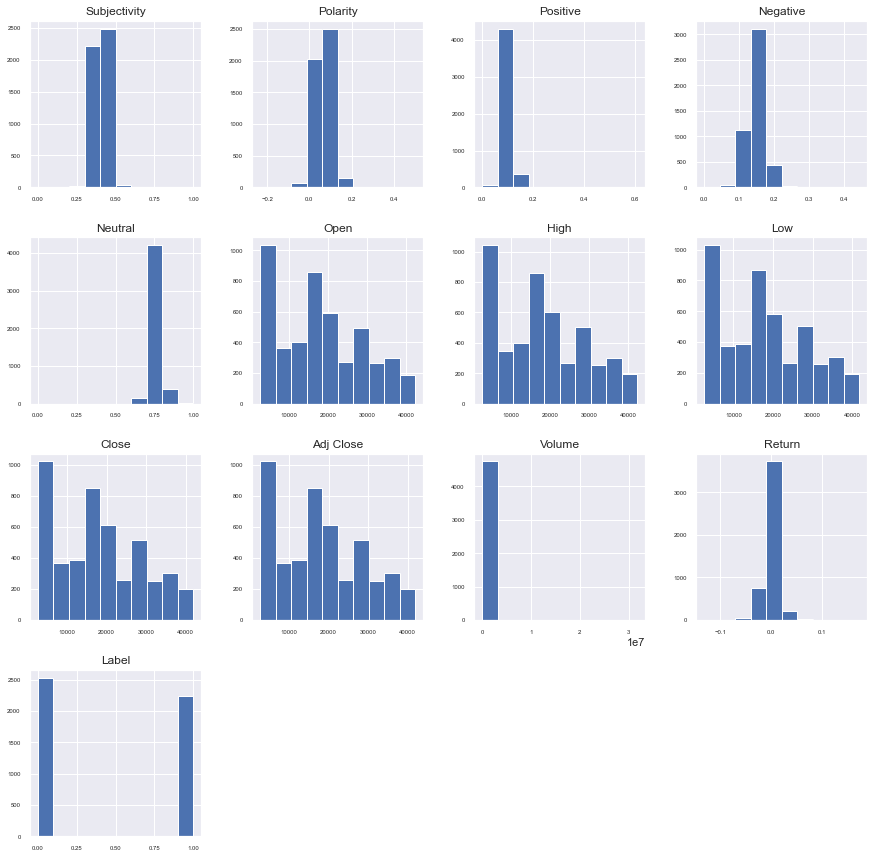

In [ ]:
# Plot a histogram for all the columns of the dataframe. This shows the frequency of values in all the columns
sns.set()
merged_data.hist(sharex = False, sharey = False, xlabelsize = 6, ylabelsize = 6, figsize=(15, 15))
pyplot.show()

# Feature inspection and filtering

### Check for NaN values in individual columns of the dataframe.

<AxesSubplot:>

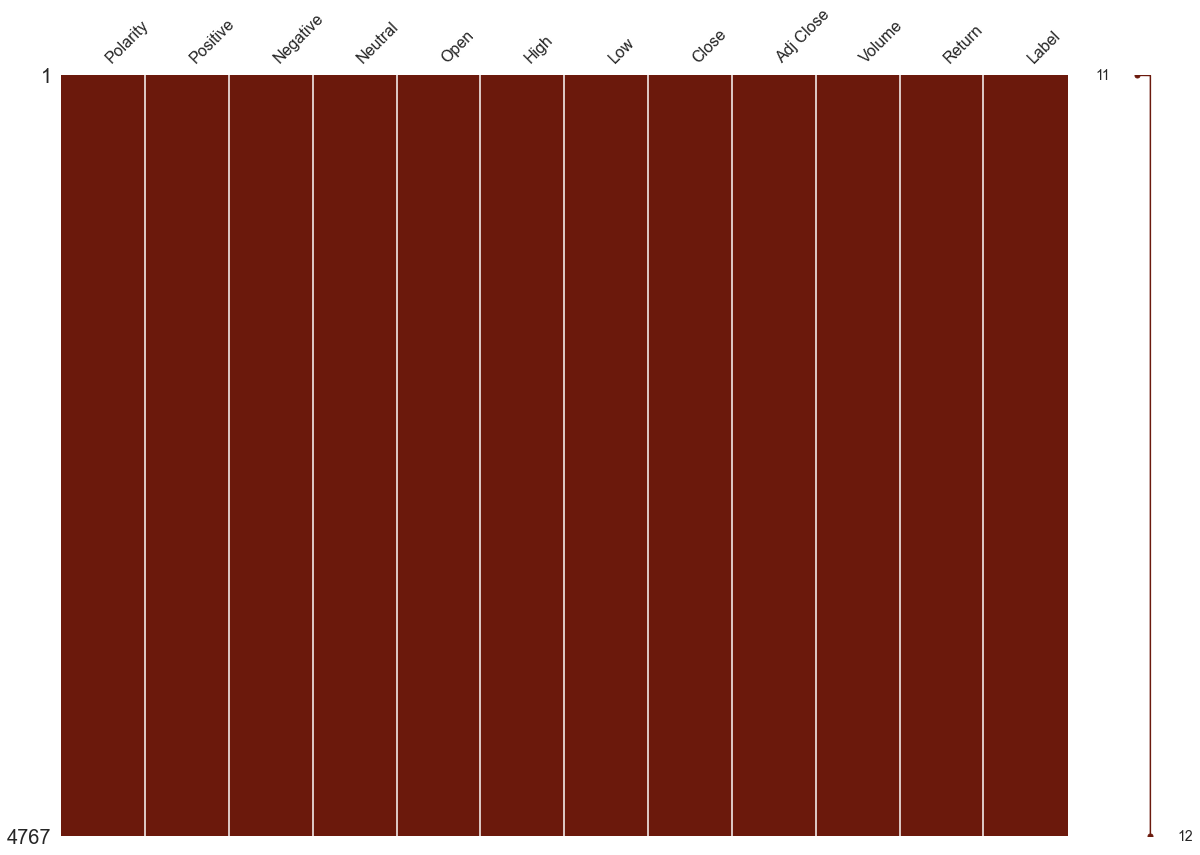

In [ ]:
merged_data_copy = merged_data
merged_data_copy = merged_data_copy.replace(-1, np.NaN)

# Nullity or missing values by columns
msno.matrix(df=merged_data.iloc[:,2:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))

# Correlation Map for features

### Plot a heat map and a scatter matrix 
The correlation of the columns with each other gave a better understanding to see if there are any dependant variables or if any of the variables are highly correlated.

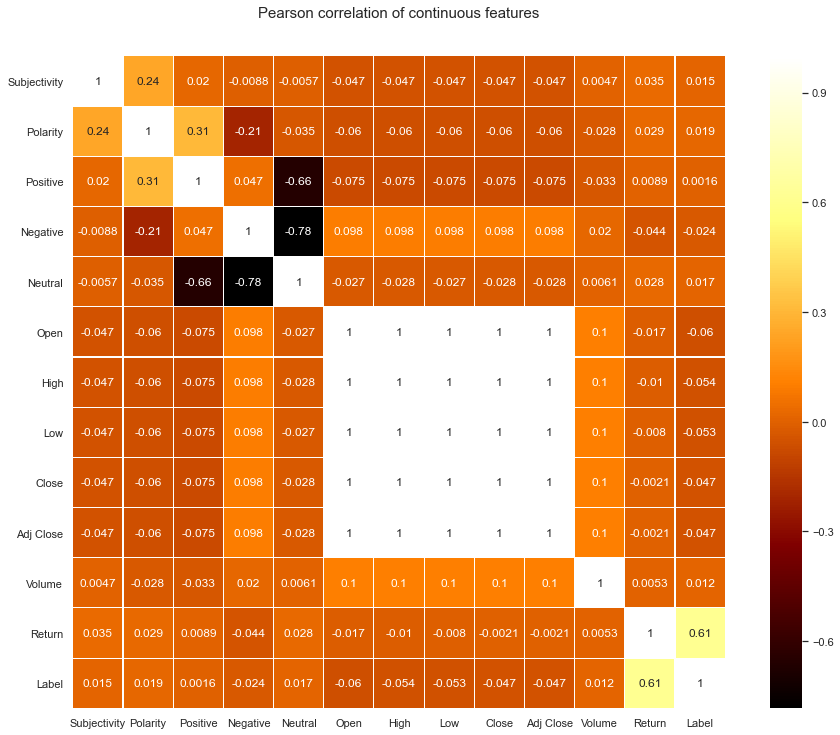

In [ ]:
colormap = pyplot.cm.afmhot
pyplot.figure(figsize=(16,12))
pyplot.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(merged_data.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)
pyplot.show()

In [ ]:
# Recheck the count
print(merged_data.count())

Date            4767
Subjectivity    4767
Polarity        4767
Positive        4767
Negative        4767
Neutral         4767
Open            4767
High            4767
Low             4767
Close           4767
Adj Close       4767
Volume          4767
Return          4766
Label           4767
dtype: int64


In [ ]:
# Fill the missing
nan_list = ['Return']
for col in nan_list:
    merged_data[col] = merged_data[col].fillna(merged_data[col].mean())

In [ ]:
# Recheck the count
print(merged_data.count())

Date            4767
Subjectivity    4767
Polarity        4767
Positive        4767
Negative        4767
Neutral         4767
Open            4767
High            4767
Low             4767
Close           4767
Adj Close       4767
Volume          4767
Return          4767
Label           4767
dtype: int64


### Data Training
Recheck the count and make sure no null values in dataframe.

Date            datetime64[ns]
Subjectivity           float64
Polarity               float64
Positive               float64
Negative               float64
Neutral                float64
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                 float64
Return                 float64
Label                    int64
dtype: object
Date            4767
Subjectivity    4767
Polarity        4767
Positive        4767
Negative        4767
Neutral         4767
Open            4767
High            4767
Low             4767
Close           4767
Adj Close       4767
Volume          4767
Return          4767
Label           4767
dtype: int64
Date            4767
Subjectivity    4767
Polarity        4767
Positive        4767
Negative        4767
Neutral         4767
Open            4767
High            4767
Low             4767
Close           4767
Adj Close       4767
Volume        

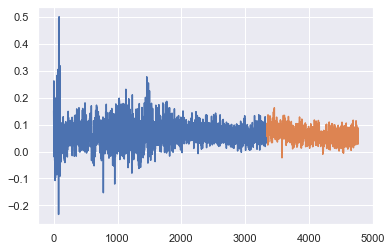

In [ ]:
# Print the datatypes and count of the dataframe
print(merged_data.dtypes)
print(merged_data.count())

# Change the NaN values to the mean value of that column
nan_list = ['Subjectivity','Polarity','Positive','Negative','Neutral','Open','High','Low','Adj Close','Volume','Return','Label']
for col in nan_list:
    merged_data[col] = merged_data[col].fillna(merged_data[col].mean())

# Recheck the count
print(merged_data.count())

# Separate the dataframe for input(X) and output variables(y)
X = merged_data.loc[:,'Polarity':'Return']
y = merged_data.loc[:,'Label']

# Set the validation size, i.e the test set to 20%
validation_size = 0.20

# Split the dataset to test and train sets
# Split the initial 70% of the data as training set and the remaining 30% data as the testing set
train_size = int(len(X.index) * 0.7)
print(len(y))
print(train_size)

X_train, X_test = X.loc[0:train_size, :], X.loc[train_size: len(X.index), :]
y_train, y_test = y.loc[0:train_size], y.loc[train_size: len(X.index)]

print('Observations: %d' % (len(X.index)))
print('X Training Observations: %d' % (len(X_train.index)))
print('X Testing Observations: %d' % (len(X_test.index)))
print('y Training Observations: %d' % (len(y_train)))
print('y Testing Observations: %d' % (len(y_test)))

pyplot.plot(X_train['Polarity'])
pyplot.plot([None for i in X_train['Polarity']] + [x for x in X_test['Polarity']])
pyplot.show()
num_folds = 10
scoring = 'accuracy'

# Append the models to the models list
models = []
models.append(('RF' , RandomForestClassifier(n_estimators=50)))
models.append(('XGBoost', XGBClassifier()))

After splitting the dataset, we can see that there are 3337 samples for training and 1431 samples for testing from 4767 data observations.

In [ ]:
# Evaluate each algorithm for accuracy
results = []
names = []

for name, model in models:
    clf = model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accu_score = accuracy_score(y_test, y_pred)
    print(name + ": " + str(accu_score))

RF: 0.8581411600279525
XGBoost: 0.8812019566736548


# Fine tune XGboost

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

model_xgb = XGBClassifier()
model_xgb.fit(rescaledX, y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model_xgb.predict(rescaledValidationX)
print("accuracy score:")
print(accuracy_score(y_test, predictions))
print("confusion matrix: ")
print(confusion_matrix(y_test, predictions))
print("classification report: ")
print(classification_report(y_test, predictions))

accuracy score:
0.8812019566736548
confusion matrix: 
[[738  65]
 [105 523]]
classification report: 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       803
           1       0.89      0.83      0.86       628

    accuracy                           0.88      1431
   macro avg       0.88      0.88      0.88      1431
weighted avg       0.88      0.88      0.88      1431



# PCA

In [ ]:
pca = PCA(n_components=3)
pca.fit(X)
transformed = pca.transform(X)

transformed.shape
print(type(transformed))

<class 'numpy.ndarray'>


In [ ]:
pca_df = pd.DataFrame(transformed)

X_train_pca, X_test_pca = pca_df.loc[0:train_size, :], pca_df.loc[train_size: len(X.index), :]

clf = XGBClassifier(n_estimators=500, max_depth=3)
clf.fit(X_train_pca, y_train)
y_pred_pca = clf.predict(X_test_pca)
score = accuracy_score(y_test, y_pred_pca)
print("Score is "+ str(score))

Score is 0.9552760307477288


# Confusion matrix test

In [ ]:
pca_matrix = confusion_matrix(y_test, y_pred_pca)
pca_report = classification_report(y_test, y_pred_pca)
print("Confusion Matrix: \n" + str(pca_matrix))
print("Classification report: \n" + str(pca_report))

Confusion Matrix: 
[[749  54]
 [ 10 618]]
Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       803
           1       0.92      0.98      0.95       628

    accuracy                           0.96      1431
   macro avg       0.95      0.96      0.95      1431
weighted avg       0.96      0.96      0.96      1431



AUC score is 0.9659269379952565
roc auc is :0.9659269379952565


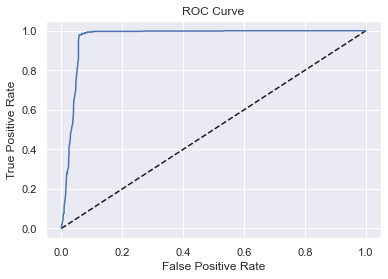

In [ ]:
# Generating the ROC curve
y_pred_proba_pca = clf.predict_proba(X_test_pca)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_pca)
roc_auc = auc(fpr, tpr)
print("AUC score is " + str(roc_auc))

# Plot ROC curve
print("roc auc is :" + str(roc_auc))
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()

 # XGBoost model accuracy is 96% 
 ### with precision : 0.96, recall : 0.96, and f1-score 0.96 that indicate very good scores.
 ## This can further be used to predict the Stock Prices.
 Further task is to predict the values based on our the model 
 
 Thank you :)